In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data_raw_insurance.csv")
df.head()


,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.45,5.0,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25.0,female,25.38,2.0,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38.0,male,44.88,2.0,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25.0,male,19.89,0.0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49.0,male,38.21,3.0,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [3]:
df_eda = df.sample(n=100_000, random_state=42)


In [4]:
df_eda.isnull().sum()


age                        3945
gender                     2384
bmi                           0
children                   3166
smoker                        0
region                        0
medical_history           24927
family_medical_history    25164
exercise_frequency            0
occupation                 3166
coverage_level                0
charges                       0
dtype: int64

Missing Value Analysis

The dataset contains missing values across both numerical and categorical features.

Numerical features such as age and children contain a small percentage of missing values.

Categorical features like gender and occupation have moderate missing values.

Medical-related features (medical_history and family_medical_history) show a significantly higher proportion of missing values.


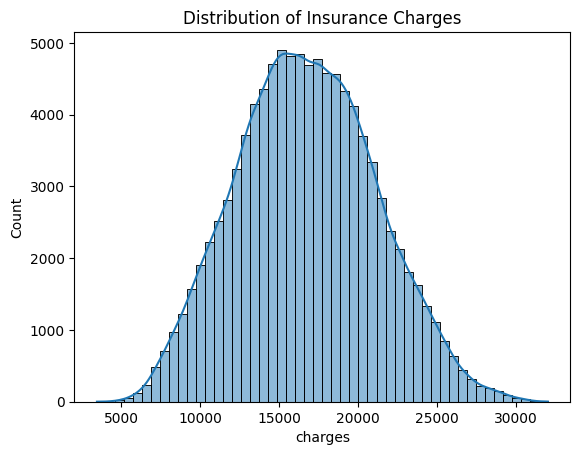

In [5]:
sns.histplot(df_eda['charges'], kde=True, bins=50)
plt.title("Distribution of Insurance Charges")
plt.show()


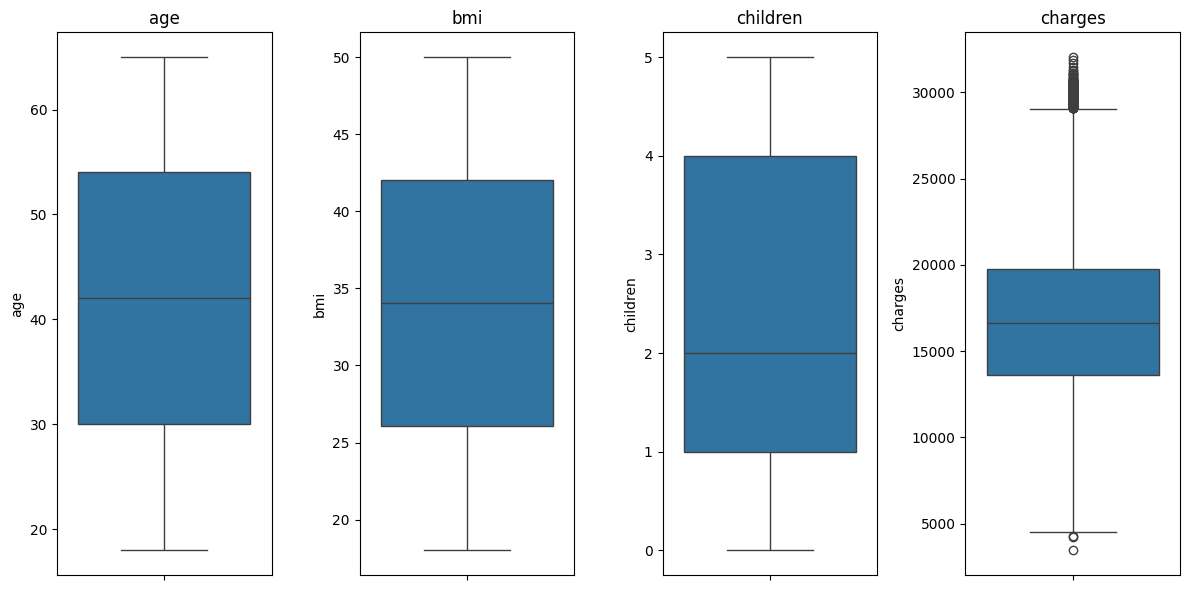

In [6]:
num_cols = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df_eda[col])
    plt.title(col)

plt.tight_layout()
plt.show()


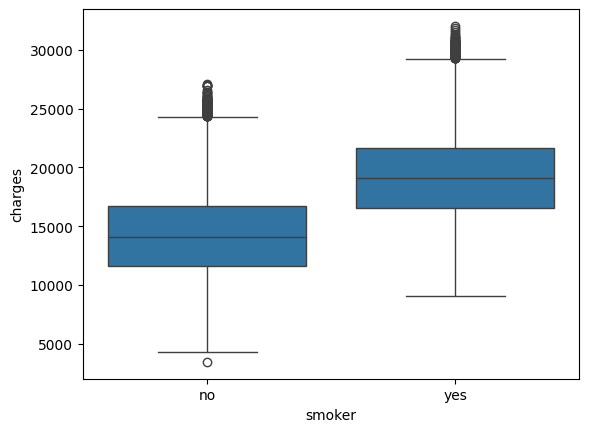

In [7]:
sns.boxplot(x='smoker', y='charges', data=df_eda)
plt.show()


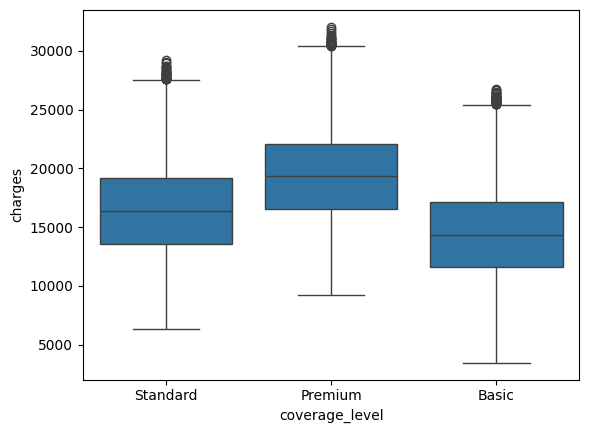

In [8]:
sns.boxplot(x='coverage_level', y='charges', data=df_eda)
plt.show()


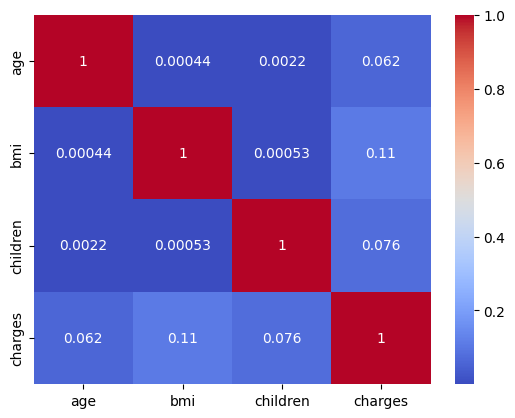

In [9]:
corr = df_eda[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
